르네상스 테크놀로지의 Peter Brown은 이전에 IBM에서 일하다가 NLP를 적용하여 가장 성공한 계량적으로 헤지 펀드를 운용한 사람이다. 요즘 가장 중요한 정보는 쓰여지거나 말해지는 언어이다. 금융 전문가들에게 대부분의 시간을 어디에 쓰는지 물어보면, 대부분의 시간을 읽는데 쓴다는 것을 알 수 있다. 다양한 애널리스트들의 리포트를 포함하여 헤드라인 등 많은 데이터들이 포함된다. 이러한 정보를 자동으로 처리하면 트레이딩 속도를 높일 수 있고 트레이딩을 위해 다양한 정보를 쓸 수 있으면 전반적으로 비용을 줄일 수 있다.

NLP는 금융 분야에 들어왓다. 예를 들면, 보험 회사들은 고객 claim을 자동으로 처리한다. 텍스트에 대한 이해로 금융 분야에 머신러닝을 적용 것이 기본이 되고 있다. 

역사적으로 NLP는 전통적으로 언어학자들에 의해 손수 만들어진 규칙에 의존했다. 언어학자는 신경망에 의해 대체되고 있다.

이번 챕터에서는 케라스에서 어떻게 파워풀한 NLP모델을 만드는지 알아볼 것이며 spaCy NLP 라이브러리에 대해서도 알아볼 것 이다.

### An introductory guide to spaCy

spaCy의 Doc과 Vocab 클래스로 구성되어 있다. Doc 인스턴스는 하나의 도큐먼트, 텍스트, 토크아니징된 버전, 그리고 개체명이 포함되어 있다. Vocab은 도큐먼트 사이에서 찾을 수 있는 정보를 담고 있다. 

spaCy는 NLP에 필요한 많은 파이프라인 features에 유용하다. 처음엔 추상적으로 들릴 수 있지만, 다양한 태스크를 다뤄보면 이해할 수 있다.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [4]:
a1 = pd.read_csv('../input/articles1.csv',index_col=0)
a2 = pd.read_csv('../input/articles2.csv',index_col=0)
a3 = pd.read_csv('../input/articles3.csv',index_col=0)

In [5]:
df = pd.concat([a1, a2, a3])

In [6]:
del a1, a2, a3

In [12]:
df

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


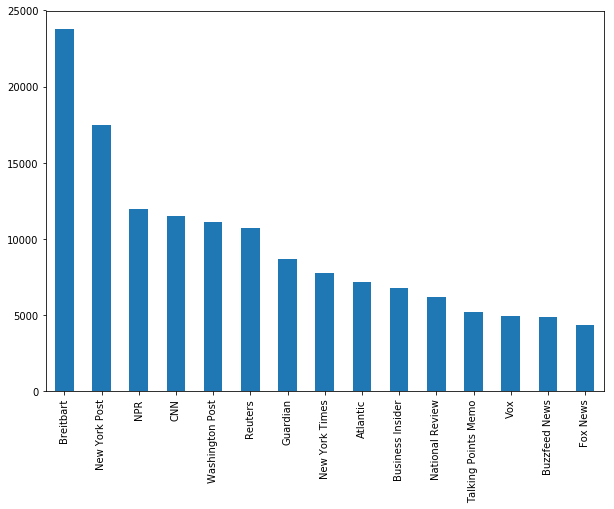

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
df.publication.value_counts().plot(kind='bar')

In [ ]:
doc = df.loc[0,'content']